## Color to grayscale

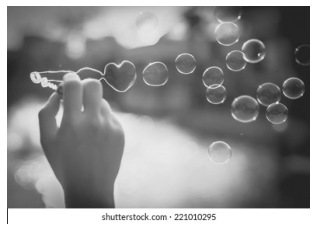

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.feature import corner_harris, corner_peaks

image = imread('test.jpg')
imagegray = rgb2gray(image)

plt.imshow(imagegray, cmap="gray")
plt.axis("off")
plt.show()

## calculation of Spatial derivative 

In [4]:
from scipy import signal as sig
import numpy as np

def gradientx(imagegray):
    ##Sobel operator kernels.
    kernelx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imagegray, kernelx, mode='same')
def gradienty(imagegray):
    kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imagegray, kernely, mode='same')

Ix = gradientx(imagegray)
Iy = gradienty(imagegray)



## setup of Structure tensor 

In [5]:
Ixx = ndi.gaussian_filter(Ix**2, sigma=1)
Ixy = ndi.gaussian_filter(Iy*Ix, sigma=1)
Iyy = ndi.gaussian_filter(Iy**2, sigma=1)

## Calculation of Harris response 

In [6]:
k = 0.05

# determinant
detM = Ixx * Iyy - Ixy ** 2
# trace
traceM = Ixx + Iyy
    
harrisresponse = detM - k * traceM ** 2

## Non-maximum suppression

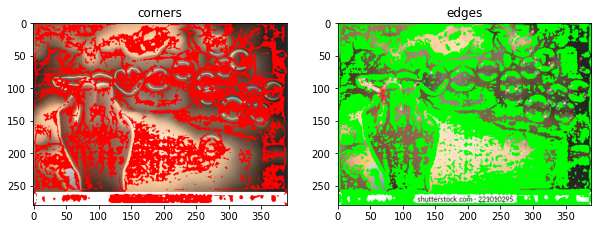

In [8]:


img_corners = np.copy(image)
img_edges = np.copy(image)

for rindex, resp in enumerate(harrisresponse):
    for colindex, r in enumerate(resp):
        if r > 0:
            # this is a corner
            img_corners[rindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_edges[rindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].set_title("corners")
ax[0].imshow(img_corners)
ax[1].set_title("edges")
ax[1].imshow(img_edges)
plt.show()

